# Lab 8: Correlation, Variance of Sample Means

Welcome to Lab 8!

In today's lab, we will learn about [the variance of sample means](https://www.inferentialthinking.com/chapters/14/5/variability-of-the-sample-mean.html) as well as ways to understand and quantify [the association between two variables](https://www.inferentialthinking.com/chapters/15/1/correlation.html).

In [4]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('lab08.ok')
_ = ok.auth(inline=True)

Assignment: Correlation and Variance of Sample Means
OK, version v1.14.15

Successfully logged in as rga2uz@virginia.edu


# 1. How Faithful is Old Faithful? 

(Note: clever title comes from [here](http://web.pdx.edu/~jfreder/M212/oldfaithful.pdf).)

Old Faithful is a geyser in Yellowstone National Park in the central United States.  It's famous for erupting on a fairly regular schedule.  You can see a video below.

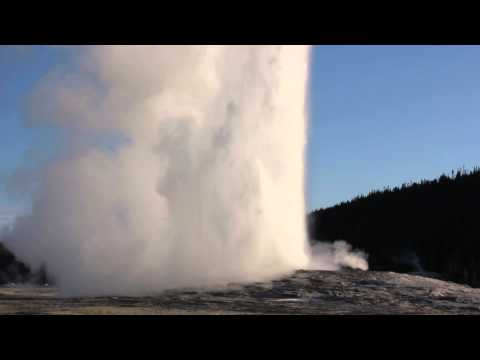

In [5]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  When it has a long eruption, there's generally a longer wait until the next eruption.

If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park and come to see the geyser when it happens.  Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:
- **duration**: Eruption duration, in minutes.
- **wait**: Time between this eruption and the next, also in minutes.

Run the next cell to load the dataset.

In [6]:
faithful = Table.read_table("faithful.csv")
faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


We would like to use linear regression to make predictions, but that won't work well if the data aren't roughly linearly related.  To check that, we should look at the data.

#### Question 1
Make a scatter plot of the data.  It's conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis.

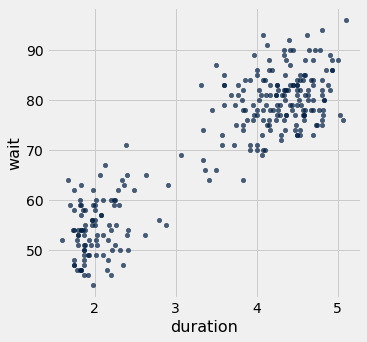

In [7]:
faithful.scatter("duration", "wait")

#### Question 2
Look at the scatter plot. Are eruption duration and waiting time roughly linearly related?  Is the relationship positive, as we claimed earlier?  You may want to consult this [section](https://www.inferentialthinking.com/chapters/15/prediction.html) of the textbook for the definition of a linear association.

Yes, there is a roughly linear, positive association between eruption duration and waiting time.

We're going to continue with the provisional assumption that they are linearly related, so it's reasonable to use linear regression to analyze this data.

We'd next like to plot the data in standard units.  Recall that, if `nums` is an array of numbers, then

    (nums - np.mean(nums)) / np.std(nums)

is an array of those numbers in standard units.

#### Question 3
Compute the mean and standard deviation of the eruption durations and waiting times.  **Then**, create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  (The columns should be named `"duration (standard units)"` and `"wait (standard units)"`.

In [10]:
duration_mean = np.mean(faithful.column("duration"))
duration_std = np.std(faithful.column("duration"))
wait_mean = np.mean(faithful.column("wait"))
wait_std = np.std(faithful.column("wait"))

faithful_standard = Table().with_columns(
    "duration (standard units)", (faithful.column("duration") - duration_mean) / duration_std,
    "wait (standard units)", (faithful.column("wait") - wait_mean) / wait_std)
faithful_standard

print(np.standard_units?)

SyntaxError: invalid syntax (<ipython-input-10-38b7ba4261fb>, line 11)

In [6]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 4
Plot the data again, but this time in standard units.

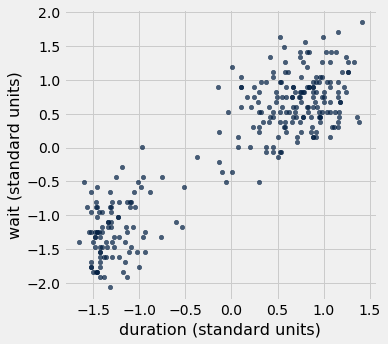

In [7]:
faithful_standard.scatter(0,1)

You'll notice that this plot looks exactly the same as the last one!  The data really are different, but the axes are scaled differently.  (The method `scatter` scales the axes so the data fill up the available space.)  So it's important to read the ticks on the axes.

#### Question 5
Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

* -1
* 0
* 1

Out of these values, the correlation coefficient for the relationship between eruption duration and waiting time is closest to 1. A correlation of 1 means the relationship between two variables is perfectly linear (all the points fall on the same 'imaginary' straight line) and positive (sloping upward); -1 would mean perfectly linear and negative. A correlation of 0 indicates that there is no association between the two variables.

#### Question 6
Compute the correlation `r`.  *Hint:* Use `faithful_standard`.  This [section](https://www.inferentialthinking.com/chapters/15/1/correlation.html) on correlation explains how to do this.

In [8]:
# the correlation coefficient r is the average of the products of the two variables...
# when both variables are measured in standard units

r = np.mean(faithful_standard.column(0) * faithful_standard.column(1))
r

0.9008111683218132

In [9]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# 2. Variability of the Sample Mean

By the Central Limit Theorem, the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher and some are lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. Formally, probability theory shows that the sample mean is an unbiased estimate of the population mean.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the variability of the sample mean and develop a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of San Francisco in 2014. Even though it's uncommon to have data of the entire population, you should think of this as the entire population of observations. It isn't a sample. The population mean salary reported by the city government was about $75463.92.

In [17]:
salaries = Table.read_table('sf_salaries_2014.csv').select("salary")
salaries

salary
471953
390112
339654
326717
326233
344187
311299
310161
335485
329391


In [18]:
salary_mean = np.mean(salaries.column('salary'))
salary_mean

75463.91814023031

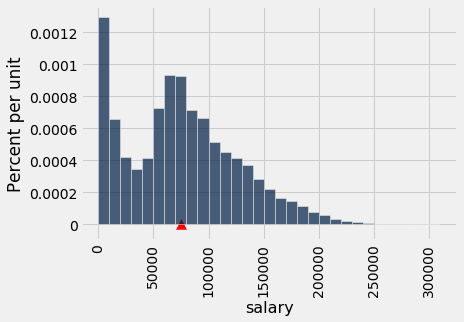

In [19]:
salaries.hist('salary', bins=np.arange(0, 300000+10000*2, 10000))
plots.scatter(salary_mean, 0, marker='^', color='red', s=100);

#### Question 1

Clearly, the population is not a normal distribution. Sampling from this is unlikely to give us histograms that look like bell curves. Keep that in mind as we progress through these exercises.

Let's take random samples and look at the probability distribution of the sample mean. Each sample mean corresponds to one sampled data set. As usual, we will use simulation to get an empirical approximation to this distribution.

We will define a function `simulate_sample_mean` to do this, because we are going to vary the sample size later. The arguments are the name of the table, the label of the column containing the variable, the sample size, the number of simulations, and whether or not we are sampling with replacement. 

Keep in mind that, if you are sampling a sample from a population, you should be drawing without replacement. If you are \*re\*-sampling from a sample, for instance if you are using the boostrap, then you will be sampling with replacement.

In [20]:
"""Empirical distribution of random sample means"""

# default argument value for wr is False unless specified in function call
def simulate_sample_mean(table, label, sample_size, repetitions, wr = False):
    
    means = make_array()

    for i in np.arange(repetitions):
        new_sample = table.sample(sample_size, with_replacement = wr)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

Verify with your neighbor that you've implemented the above function correctly. If you haven't implemented it correctly, the rest of the lab won't work properly, so this step is crucial.

#### Question 2

In the following cell, we look at the distribution of a sample mean created from a sample of size 100. We will sample 1000 times, and plot the histogram of all 1000 sample means using our new `simulate_sample_mean` function.

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75326.1517332
Population SD: 51697.0349864653
SD of sample means: 5188.645228897796


(50000, 100000)

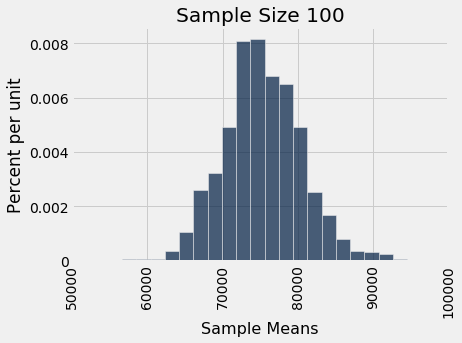

In [21]:
simulate_sample_mean(salaries, 'salary', 100, 1000, False) 
plots.xlim(50000, 100000)

In the following two cells, investigate the distribution of a sample mean computed from a random sample of 100 salaries and 625 salaries, respectively. In each case, perform 1,000 repetitions of each of these processes. Don't worry about the `plots.xlim` line – it just makes sure that all of the plots have the same x-axis. 

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75240.22141320001
Population SD: 51697.0349864653
SD of sample means: 5009.314720225888


(50000, 100000)

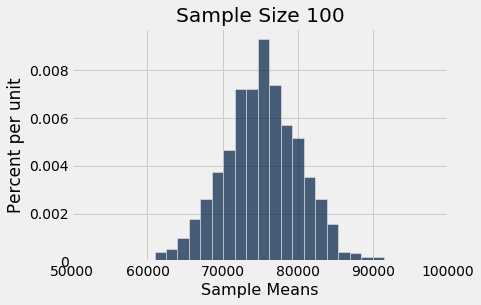

In [23]:
# sampling without replacement; we are sampling from the total population, not resampling from a sample

# randomly sampling 100 rows from complete salaries table, computing mean; repeating 1000 times; plot distribution 
simulate_sample_mean(salaries, "salary", 100, 1000 )
plots.xlim(50000, 100000)

Sample size:  625
Population mean: 75463.91814023031
Average of sample means:  75417.02102174402
Population SD: 51697.0349864653
SD of sample means: 2036.259603584348


(50000, 100000)

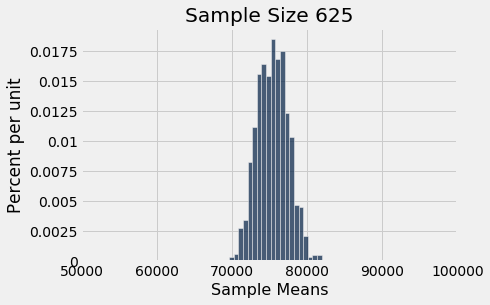

In [24]:
simulate_sample_mean(salaries, "salary", 625, 1000)
plots.xlim(50000, 100000)

Write your conclusions about what you just saw in the below cell.

**Conclusions:** 

All of the distributions are roughly normal. In the textbook, the Central Limit Theorem (CLT) is stated as follows: the probability distribution of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn. That holds true here; our distributions of sample means are normal, even though the empirical distribution of salaries for the population is not normal.

Now, we are not drawing a sample with replacement. This is done in the context of boostrapping when you are resampling from a simple random sample drawn from the total population. With replacement, all the values are independent. In a simple random sample without replacement, this is not the case.

Each distribution of the sample means is centered very close to the population mean, which is expected. The sample mean is an unbiased estimate of the population mean. 

As the sample size increases, the distribution becomes narrower, or more tightly centered around the sample mean. The standard deviation measures the dispersion of a dataset relative to the mean, or roughly how far the numbers are from their average. In this case, that is how far all the means in the distribution are from their average, which is our estimate of the mean of the total population. We know that the standard deviation of all possible sample means (standard error) of a fixed sample size is equal to the population standard deviation divided by the square root of the sample size. This means that the variability of the sample mean decreases, i.e. the standard deviation (standard error) decreases, as the sample size increases, so larger sample sizes lead to narrower and taller distributions.

#### Question 3

Assign the variable `bootstrap_sampled_SD` to the integer corresponding to your answer to the following question:

When I am sampling with replacement from a sample in a table, increasing the number of re-samples that I take, for a fixed sample size, will make the SD of my sample mean ...

1. Increase
2. Decrease
3. Stay about the same
4. Vary widly

In [25]:
bootstrap_sampled_SD = 3

In [26]:
ok.grade('q2_3');

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Below, we'll look at what happens when we take a fixed sample, then bootstrap from it with different numbers of resamples. How does the distribution of the resampled means change?

Sample size:  100
Population mean: 71577.8227
Average of sample means:  71532.1791456
Population SD: 50588.01286279767
SD of sample means: 4890.214478769273


(50000, 100000)

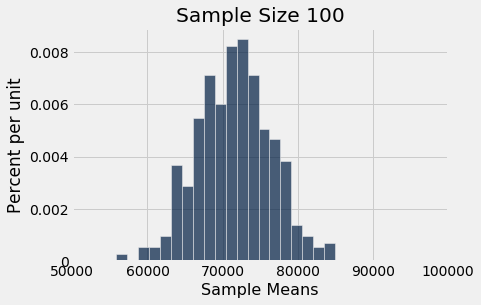

In [27]:
one_sample = salaries.sample(100, with_replacement = False)
simulate_sample_mean(one_sample, 'salary', one_sample.num_rows, 500, True)
plots.xlim(50000, 100000)

Sample size:  100
Population mean: 71577.8227
Average of sample means:  71375.61747260002
Population SD: 50588.01286279767
SD of sample means: 4902.434158497261


(50000, 100000)

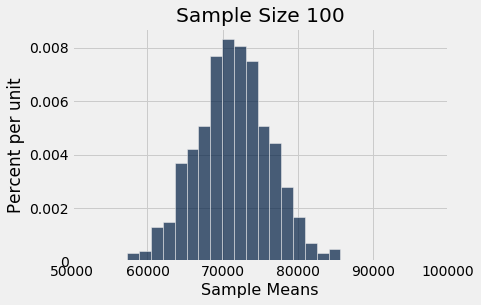

In [28]:
simulate_sample_mean(one_sample, 'salary', 100, 1000, True)
plots.xlim(50000, 100000)

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75506.03089684
Population SD: 51697.0349864653
SD of sample means: 5148.038497882179


(50000, 100000)

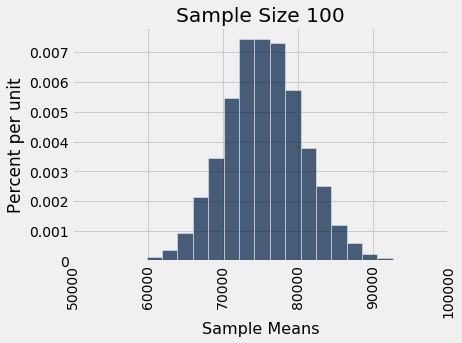

In [29]:
simulate_sample_mean(salaries, 'salary', 100, 5000, True)
plots.xlim(50000, 100000)

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75429.63567172001
Population SD: 51697.0349864653
SD of sample means: 5184.079414977749


(50000, 100000)

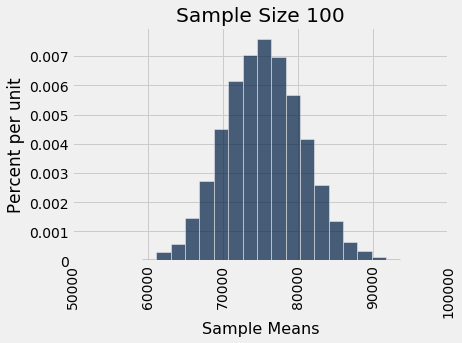

In [30]:
simulate_sample_mean(salaries, 'salary', 100, 10000, True)
plots.xlim(50000, 100000)

What did you notice about the sample means of the four bootstrapped samples above? Discuss with your neighbors. If you're unsure of your conclusion, ask me!

#### Question 4
Let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Again, assign the variable `pop_vs_sample` to the integer corresponding to your answer.

1. Sample SD gets smaller with increasing sample size, SD of sample means gets smaller with increasing sample size
2. Sample SD gets larger with increasing sample size, SD of sample means stays the same with increasing sample size
3. Sample SD becomes more consistent with population SD with increasing sample size, SD of sample means gets smaller with increasing sample size
4. Sample SD becomes more consistent with populatoin SD with increasing sample size, SD of smaple means stays the same with increasing sample size

In [38]:
pop_vs_sample = 3

In [39]:
ok.grade('q2_4');

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Let's see what happens: First, we calculate the population SD so that we can compare the SD of each sample to the SD of the population.

In [40]:
pop_sd = np.std(salaries.column("salary"))
pop_sd

51697.0349864653

Let's then see how a small sample behaves. Run the following cells multiple times to see how the SD of the sample changes from sample to sample. Adjust the bins as necessary.

Sample SD:  48364.8403791444
Sample size:  10
Population mean: 67457.352
Average of sample means:  68118.372115
Population SD: 48364.8403791444
SD of sample means: 15095.737590002656


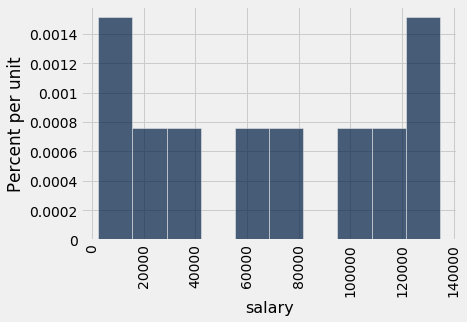

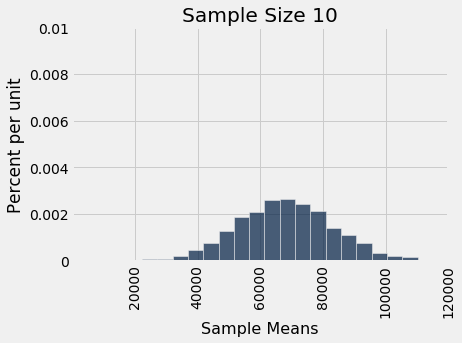

In [41]:
sample_10 = salaries.sample(10, with_replacement = False)
sample_10.hist("salary")
print("Sample SD: ", np.std(sample_10.column("salary")))
simulate_sample_mean(sample_10, 'salary', 10, 1000, True)
plots.xlim(5,120000)
plots.ylim(0, .0001);

Sample SD:  52926.44410036517
Sample size:  200
Population mean: 80270.8825
Average of sample means:  80313.89959725
Population SD: 52926.44410036517
SD of sample means: 3710.394039616416


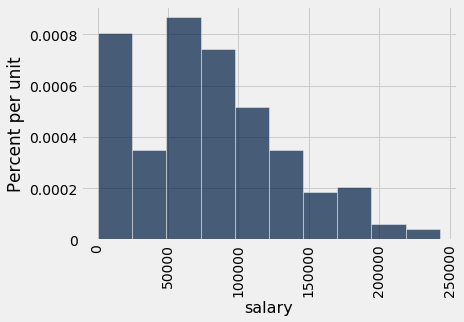

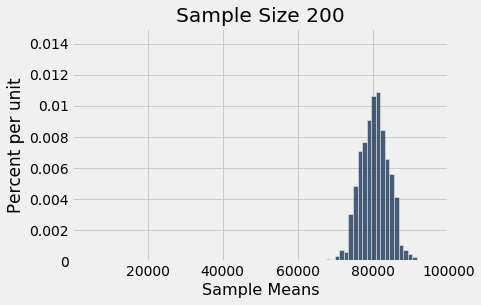

In [42]:
sample_200 = salaries.sample(200, with_replacement = False)
sample_200.hist("salary")
print("Sample SD: ", np.std(sample_200.column("salary")))
simulate_sample_mean(sample_200, 'salary', 200, 1000, True)
plots.xlim(5,100000)
plots.ylim(0, .00015);

Sample SD:  53369.5868876332
Sample size:  1000
Population mean: 76225.79053
Average of sample means:  76276.45834266
Population SD: 53369.5868876332
SD of sample means: 1724.2284510919812


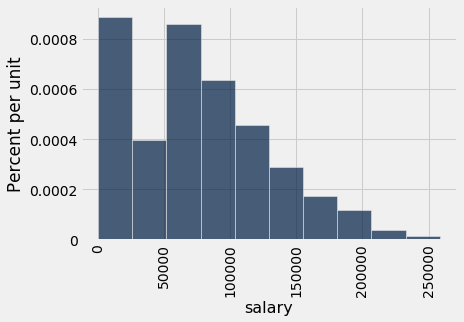

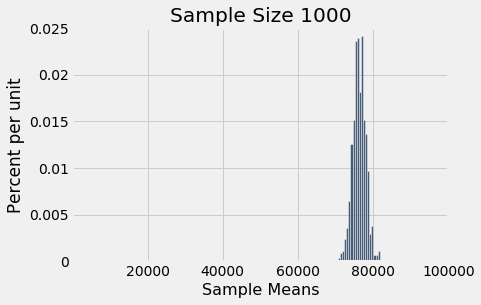

In [43]:
sample_1000 = salaries.sample(1000, with_replacement = False)
sample_1000.hist("salary")
print("Sample SD: ", np.std(sample_1000.column("salary")))
simulate_sample_mean(sample_1000, 'salary', 1000, 1000, True)
plots.xlim(5,100000)
plots.ylim(0, .00025);

Let's illustrate this trend. Below, you will see how the average absolute error of SD from the population changes with sample size (N). See if you can understand the code.

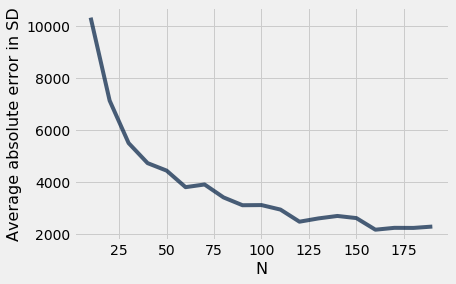

In [44]:
# Don't change this cell, just run it!
sample_n_errors = make_array()
for i in np.arange(10, 200, 10):
    sample_n_errors = np.append(sample_n_errors, np.average([abs(np.std(salaries.sample(i).column("salary"))-pop_sd)
                                                      for d in np.arange(100)]))
Table().with_columns("Average absolute error in SD", sample_n_errors, "N", np.arange(10, 200, 10)).plot("N", "Average absolute error in SD")



# an equivalent piece f code...potentially more readable...but slower
# sample_n_errors = make_array()
# for i in np.arange(10, 200, 10):
    
#     # take the average of these
#     sd_errors = make_array()
#     for repetition in np.arange(100):
#         # get a sample (notice the different sample size each time)
#         salary_sample = salaries.sample(i, with_replacement=False).column("salary")
#         est_sd = np.std(salary_sample)
#         sd_est_error = abs(est_sd-pop_sd)
#         sd_errors = np.append(sd_errors, sd_est_error)
    
#     # store the average error of all those repetitions
#     sample_n_errors = np.append(sample_n_errors, np.average(sd_errors))
# Table().with_columns("Average absolute error in SD", sample_n_errors, 
#                      "N", np.arange(10, 200, 10)).plot("N", "Average absolute error in SD")

You should notice that the distribution of means gets narrower, and that the distribution of the sample increasingly looks like the distribution of the population as we get to larger sample sizes. 

Is there a relationship between the sample size and absolute error in standard deviation? Identify this relationship – if you're having trouble, take a look at this [section](https://www.inferentialthinking.com/chapters/14/2/Variability.html) in our textbook about the variability of sample means.

That's it! You've completed Lab 8. There weren't many tests, but there were a lot of points at which you should've stopped and understood exactly what was going on. Consult the textbook or your neighbor, or ask me if you have any other questions!

Be sure to 
- **run all the tests** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **run the last cell to submit your work**,
- and ask one of the staff members to check you off.

In [45]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
val = lambda q: q.startswith('q1') or q.startswith('q2_3') or q.startswith('q2_4')
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if val(q)]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

Finished running all tests.


In [46]:
# Run this cell to submit your work *after* you have passed all of the test cells.
# It's ok to run this cell multiple times. Only your final submission will be scored.

_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab08.ipynb'.
Submit... 100% complete
Submission successful for user: rga2uz@virginia.edu
URL: https://okpy.org/uva/stat_1602/fa19/lab08/submissions/Vv9PvO

